# Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# Load Data

In [2]:
metrics = pd.read_csv('metricData.zip', index_col=0)

In [3]:
metrics.head()

,TotalLinesOfCode,TotalSymbols,SymbolsPerLine,Area,AreaPerLine,TotalConnectivity,TotalConnectivityPerLine,FieldConnectivity,FieldConnectivityPerLine,MethodConnectivity,...,KeywordLongCountPerLine,KeywordStrictfpTotalCount,KeywordStrictfpCountPerLine,KeywordFloatTotalCount,KeywordFloatCountPerLine,KeywordSuperTotalCount,KeywordSuperCountPerLine,KeywordWhileTotalCount,KeywordWhileCountPerLine,label
0,25.0,1127.0,45.080000,63.0,2.520000,1.0,0.033333,1.0,0.033333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6.0,170.0,28.333333,1.0,0.166667,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2.0,39.0,19.500000,0.0,0.000000,2.0,1.000000,1.0,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6.0,223.0,37.166667,3.0,0.500000,1.0,0.200000,1.0,0.200000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2.0,111.0,55.500000,0.0,0.000000,1.0,0.333333,1.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Class Imbalance

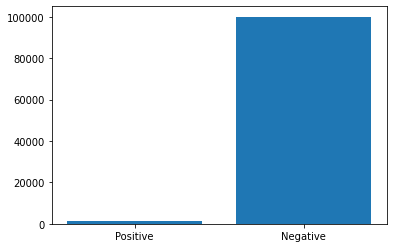

In [12]:
positives = metrics[metrics["label"] == 1]
negatives = metrics[metrics["label"] == 0]

plt.bar(["Positive","Negative"],[len(positives),len(negatives)]);

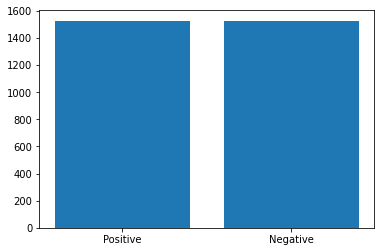

In [15]:
balanceNegatives = negatives.sample(frac=1)[:len(positives)]

plt.bar(["Positive","Negative"],[len(positives),len(balanceNegatives)]);

In [18]:
balanceMetrics = pd.concat([positives,balanceNegatives]).sample(frac = 1)

# Data Processing

In [30]:
from sklearn.preprocessing import StandardScaler

In [21]:
features = balanceMetrics.iloc[:,:-1]
labels = balanceMetrics.iloc[:,-1]

In [42]:
trainX = features.iloc[:int(.8*len(features))]
trainY = labels.iloc[:int(.8*len(features))]

testX = features.iloc[int(.8*len(features)):]
testY = labels.iloc[int(.8*len(features)):]

In [43]:
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


In [44]:
#Reshape data for CNN
trainX = trainX[..., None]
trainY = trainY[..., None]

testX = testX[..., None]
testY = testY[..., None]

/var/folders/fr/03zv9zcj7j146mrr4jsb58kw0000gn/T/ipykernel_19821/1448998680.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  trainY = trainY[..., None]
/var/folders/fr/03zv9zcj7j146mrr4jsb58kw0000gn/T/ipykernel_19821/1448998680.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  testY = testY[..., None]


# Model Creation

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from tensorflow.keras import layers, models
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [46]:
batch_size=64
num_epochs = 15
    
model = Sequential()

model.add((Conv1D(filters=32, kernel_size=3, activation='relu')))
model.add((Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add((MaxPooling1D(pool_size=2)))
model.add(Dropout(0.25))
model.add((Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add((MaxPooling1D(pool_size=2)))
model.add(Dropout(0.25))
model.add((Conv1D(filters=128, kernel_size=3, activation='relu')))
model.add((MaxPooling1D(pool_size=2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

adam = tf.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC(curve='PR'),
                                                                   tf.keras.metrics.PrecisionAtRecall(0.8)])

model.fit(trainX, trainY, epochs = num_epochs, batch_size=batch_size)

Epoch 1/15
39/39 [==============================] - 3s 30ms/step - loss: 0.6891 - auc_2: 0.5566 - precision_at_recall_2: 0.5225
Epoch 2/15
39/39 [==============================] - 1s 30ms/step - loss: 0.6661 - auc_2: 0.6340 - precision_at_recall_2: 0.5420
Epoch 3/15
39/39 [==============================] - 1s 27ms/step - loss: 0.6306 - auc_2: 0.6967 - precision_at_recall_2: 0.5900
Epoch 4/15
39/39 [==============================] - 1s 27ms/step - loss: 0.6050 - auc_2: 0.7320 - precision_at_recall_2: 0.6172
Epoch 5/15
39/39 [==============================] - 1s 29ms/step - loss: 0.5882 - auc_2: 0.7570 - precision_at_recall_2: 0.6364
Epoch 6/15
39/39 [==============================] - 1s 26ms/step - loss: 0.5812 - auc_2: 0.7653 - precision_at_recall_2: 0.6463
Epoch 7/15
39/39 [==============================] - 1s 26ms/step - loss: 0.5604 - auc_2: 0.7838 - precision_at_recall_2: 0.6582
Epoch 8/15
39/39 [==============================] - 1s 26ms/step - loss: 0.5562 - auc_2: 0.7897 - precis

# Model Evaluation 

In [47]:
model.evaluate(testX,testY)

20/20 [==============================] - 1s 7ms/step - loss: 0.4988 - auc_2: 0.8438 - precision_at_recall_2: 0.6977


[0.4987703561782837, 0.843826413154602, 0.6976743936538696]